### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of heart failure events based on clinical records. You have been provided with a dataset named **`"heart_failure_clinical_records.csv"`** which includes various clinical parameters of patients. The dataset comprises the following columns:

- age: Age of the patient (years)
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (binary, 1 for male, 0 for female)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- death_event: If the patient died during the follow-up period (boolean)

Your task is to use this dataset to build and evaluate machine learning models to predict heart failure events. You will perform data preprocessing, exploratory data analysis, and model training using GaussianNB, SVM, and XGBoost. Additionally, you will use ROC curves to analyze model performance and make cost-benefit decisions.

**Dataset credits:** Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.



**Import Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,auc

### Task 1: Data Preprocessing and Exploratory Data Analysis

1. Import the data from the `"heart_failure_clinical_records.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for missing values and handle them appropriately.
5. Perform basic statistical analysis and visualization to understand the distribution of each feature.
    - Use `histograms` for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).
    - Use `bar plots` for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).

In [3]:
df = pd.read_csv("heart_failure_clinical_records.csv")
print(df.shape)
df.head()

(5000, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

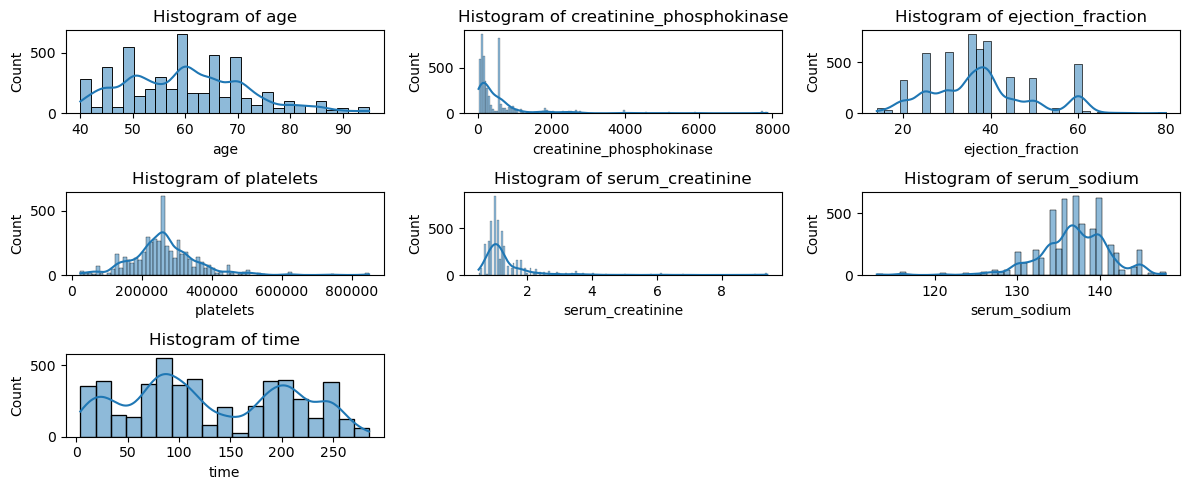

In [5]:
import seaborn as sb
features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
plt.figure(figsize=(12,5))
for i,feature in enumerate(features):
    plt.subplot(3,3,i+1)
    sb.histplot(df[feature],kde=True)
    plt.title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()

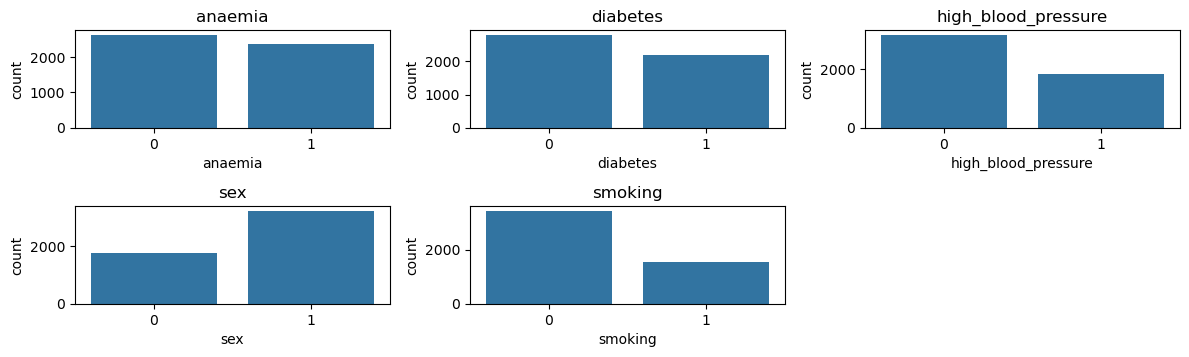

In [6]:
features2 = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
plt.figure(figsize=(12,5))
for i,feature in enumerate(features2):
    plt.subplot(3,3,i+1)
    sb.barplot(df[feature].value_counts())
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

### Task 2: Feature Transformation

1. Split the dataset into training and test sets with a test size of 25%.
2. Normalize continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time) using StandardScaler.

In [7]:
X = df.drop("death_event",axis=1)
y = df["death_event"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])


### Task 3: Model Training and Evaluation with GaussianNB

1. Initialize and train a `GaussianNB` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the GaussianNB model.
4. Find the probability threshold associated with a desired recall of 85% and print the corresponding false positive rate.

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_predict = gnb.predict(X_test)
report = classification_report(y_test,gnb_predict)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [35]:
probs = gnb.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_test,probs)
gnb_auc = auc(fpr_gnb,tpr_gnb)
gnb_auc

0.8790854196850709

In [36]:
predicted_recal = 0.85

closest_index = np.argmin(abs(tpr_gnb-predicted_recal))
fpr_gnb[closest_index],tpr_gnb[closest_index],threshold_gnb[closest_index]

(0.28944381384790013, 0.8482384823848238, 0.09000947872506998)

### Task 4: Model Training and Evaluation with SVM

1. Initialize and train an `SVM` model with a linear kernel using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the SVM model.
4. Find the probability threshold associated with a desired recall of 90% and print the corresponding false positive rate.

In [22]:
model = SVC(kernel="linear",probability=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [32]:
probs = model.predict_proba(X_test)[:,1]
y_pred = (probs>0.18).astype(int)
cr = classification_report(y_test,y_pred)
print(cr)
fpr_svc,tpr_svc,threshold_svc=roc_curve(y_test,probs)
svc_auc = auc(fpr_svc,tpr_svc)
svc_auc

              precision    recall  f1-score   support

           0       0.94      0.64      0.76       881
           1       0.51      0.90      0.65       369

    accuracy                           0.72      1250
   macro avg       0.73      0.77      0.71      1250
weighted avg       0.81      0.72      0.73      1250



0.893216934439492

In [37]:
desired_recall = 0.9

closest_index = np.argmin(abs(tpr_svc-desired_recall))
fpr_svc[closest_index],tpr_svc[closest_index],threshold_svc[closest_index]

(0.3348467650397276, 0.8997289972899729, 0.18841315506125234)

### Task 5: Model Training and Evaluation with XGBoost

1. Initialize and train an `XGBoost` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the XGBoost model.

In [38]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.99      0.98      0.98       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [39]:
probs = xgb.predict_proba(X_test)[:,1]
fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y_test,probs)
xgb_auc = auc(fpr_xgb,tpr_xgb)
xgb_auc

0.999249436308211

### Task 6: Summary and Conclusion

1. Plot the ROC curves for `GaussianNB, SVM, and XGBoost` models on the same chart.
2. Summarize the results and compare the performance of the models.

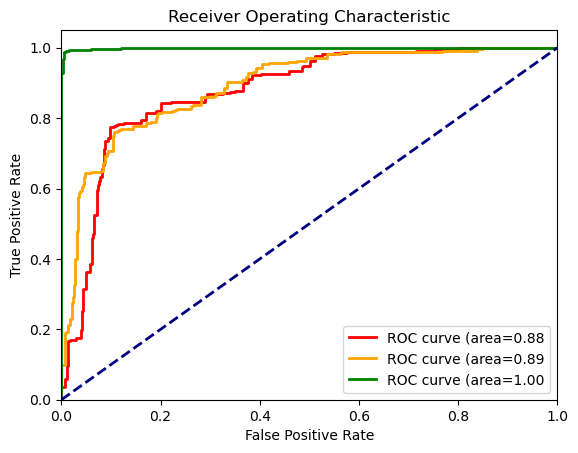

In [40]:
plt.figure()
plt.plot(fpr_gnb,tpr_gnb,color="red",lw=2,label="ROC curve (area=%0.2f"% gnb_auc)
plt.plot(fpr_svc,tpr_svc,color="orange",lw=2,label="ROC curve (area=%0.2f"% svc_auc)
plt.plot(fpr_xgb,tpr_xgb,color="green",lw=2,label="ROC curve (area=%0.2f"% xgb_auc)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Conclusion

--------
--------
